In [86]:
import requests
import pandas as pd
from secrets_config import opensky_api_key # https://openskynetwork.github.io/opensky-api/rest.html
import time
import numpy as np  


In [87]:
''' 
current_time = int(time.time())
one_hour_ago = current_time - 3600
print(current_time, one_hour_ago)
''' 

' \ncurrent_time = int(time.time())\none_hour_ago = current_time - 3600\nprint(current_time, one_hour_ago)\n'

In [88]:
current_time = int(time.mktime(time.strptime('2025-01-01 01:00:00', '%Y-%m-%d %H:%M:%S')))
one_hour_ago = current_time - 3600
print(current_time, one_hour_ago)

1735664400 1735660800


In [89]:
root_url = 'https://opensky-network.org/api/flights/all'

In [90]:
# open sky api usage docs: # https://openskynetwork.github.io/opensky-api/rest.html
params = {
    "begin": one_hour_ago,
    "end": current_time
} 
response = requests.get(f"{root_url}", params=params)
print(response.status_code)
response_data = response.json()

200


In [91]:
# showing the data 

df_flights = pd.json_normalize(data=response_data)

df_flights.head()

,icao24,firstSeen,estDepartureAirport,lastSeen,estArrivalAirport,callsign,estDepartureAirportHorizDistance,estDepartureAirportVertDistance,estArrivalAirportHorizDistance,estArrivalAirportVertDistance,departureAirportCandidatesCount,arrivalAirportCandidatesCount
0,a07825,1735661113,K3N6,1735663986,K3N6,N12947,1868.00,255.00,2659.00,171.00,3,9
1,a07db9,1735661001,XS80,1735661729,XS80,N206MT,6230.00,275.00,10707.00,275.00,3,11
2,a1ba37,1735662210,KISP,1735664056,KISP,N210HF,1973.00,183.00,2039.00,91.00,0,3
3,a31486,1735661531,KATL,1735663376,SC99,EDV5342,1343.00,30.00,6302.00,908.00,1,10
4,a511fe,1735661832,KORD,1735663646,KCMI,AWI6045,1642.00,229.00,1861.00,135.00,0,13


In [92]:
df_flights['firstSeen'] = pd.to_datetime(df_flights['firstSeen'], unit='s')
df_flights['lastSeen'] = pd.to_datetime(df_flights['lastSeen'], unit='s')
df_flights.head()

,icao24,firstSeen,estDepartureAirport,lastSeen,estArrivalAirport,callsign,estDepartureAirportHorizDistance,estDepartureAirportVertDistance,estArrivalAirportHorizDistance,estArrivalAirportVertDistance,departureAirportCandidatesCount,arrivalAirportCandidatesCount
0,a07825,2024-12-31 16:05:13,K3N6,2024-12-31 16:53:06,K3N6,N12947,1868.00,255.00,2659.00,171.00,3,9
1,a07db9,2024-12-31 16:03:21,XS80,2024-12-31 16:15:29,XS80,N206MT,6230.00,275.00,10707.00,275.00,3,11
2,a1ba37,2024-12-31 16:23:30,KISP,2024-12-31 16:54:16,KISP,N210HF,1973.00,183.00,2039.00,91.00,0,3
3,a31486,2024-12-31 16:12:11,KATL,2024-12-31 16:42:56,SC99,EDV5342,1343.00,30.00,6302.00,908.00,1,10
4,a511fe,2024-12-31 16:17:12,KORD,2024-12-31 16:47:26,KCMI,AWI6045,1642.00,229.00,1861.00,135.00,0,13


In [93]:

pd.options.display.float_format = '{:.2f}'.format
df_flights['estDepartureAirportDistance'] = np.sqrt(df_flights['estDepartureAirportHorizDistance']**2 + df_flights['estDepartureAirportVertDistance']**2)
df_flights['estArrivalAirportDistance'] = np.sqrt(df_flights['estArrivalAirportHorizDistance']**2 + df_flights['estArrivalAirportVertDistance']**2)

df_flights.head()

,icao24,firstSeen,estDepartureAirport,lastSeen,estArrivalAirport,callsign,estDepartureAirportHorizDistance,estDepartureAirportVertDistance,estArrivalAirportHorizDistance,estArrivalAirportVertDistance,departureAirportCandidatesCount,arrivalAirportCandidatesCount,estDepartureAirportDistance,estArrivalAirportDistance
0,a07825,2024-12-31 16:05:13,K3N6,2024-12-31 16:53:06,K3N6,N12947,1868.00,255.00,2659.00,171.00,3,9,1885.32,2664.49
1,a07db9,2024-12-31 16:03:21,XS80,2024-12-31 16:15:29,XS80,N206MT,6230.00,275.00,10707.00,275.00,3,11,6236.07,10710.53
2,a1ba37,2024-12-31 16:23:30,KISP,2024-12-31 16:54:16,KISP,N210HF,1973.00,183.00,2039.00,91.00,0,3,1981.47,2041.03
3,a31486,2024-12-31 16:12:11,KATL,2024-12-31 16:42:56,SC99,EDV5342,1343.00,30.00,6302.00,908.00,1,10,1343.34,6367.08
4,a511fe,2024-12-31 16:17:12,KORD,2024-12-31 16:47:26,KCMI,AWI6045,1642.00,229.00,1861.00,135.00,0,13,1657.89,1865.89


In [94]:
df_flights_transformed = df_flights[['icao24', 'firstSeen', 'estDepartureAirport', 'lastSeen', 'estArrivalAirport', 'callsign', 'estDepartureAirportDistance', 'estArrivalAirportDistance']]
df_flights_transformed.head()

,icao24,firstSeen,estDepartureAirport,lastSeen,estArrivalAirport,callsign,estDepartureAirportDistance,estArrivalAirportDistance
0,a07825,2024-12-31 16:05:13,K3N6,2024-12-31 16:53:06,K3N6,N12947,1885.32,2664.49
1,a07db9,2024-12-31 16:03:21,XS80,2024-12-31 16:15:29,XS80,N206MT,6236.07,10710.53
2,a1ba37,2024-12-31 16:23:30,KISP,2024-12-31 16:54:16,KISP,N210HF,1981.47,2041.03
3,a31486,2024-12-31 16:12:11,KATL,2024-12-31 16:42:56,SC99,EDV5342,1343.34,6367.08
4,a511fe,2024-12-31 16:17:12,KORD,2024-12-31 16:47:26,KCMI,AWI6045,1657.89,1865.89


In [95]:
# read list of airports by icao codes
df_airports = pd.read_csv("data/airport-codes.csv") # from  https://github.com/datasets/airport-codes/tree/main
df_airports.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,icao_code,iata_code,gps_code,local_code,coordinates
0,00A,heliport,Total RF Heliport,11.00,NaN,US,US-PA,Bensalem,NaN,NaN,K00A,00A,"40.070985, -74.933689"
1,00AA,small_airport,Aero B Ranch Airport,3435.00,NaN,US,US-KS,Leoti,NaN,NaN,00AA,00AA,"38.704022, -101.473911"
2,00AK,small_airport,Lowell Field,450.00,NaN,US,US-AK,Anchor Point,NaN,NaN,00AK,00AK,"59.947733, -151.692524"
3,00AL,small_airport,Epps Airpark,820.00,NaN,US,US-AL,Harvest,NaN,NaN,00AL,00AL,"34.86479949951172, -86.77030181884766"
4,00AN,small_airport,Katmai Lodge Airport,80.00,NaN,US,US-AK,King Salmon,NaN,NaN,00AN,00AN,"59.093287, -156.456699"


In [96]:
# Merge for departure airport information
merged_departure = df_flights_transformed.merge(df_airports, left_on='estDepartureAirport', right_on='ident', how='left').drop('ident', axis=1)
merged_departure = merged_departure.rename(columns={
    'type': 'departure_type',
    'name': 'departure_airport_name',
    'elevation_ft': 'departure_elevation_ft',
    'continent': 'departure_continent',
    'iso_country': 'departure_country',
    'iso_region': 'departure_iso_region',
    'municipality': 'departure_municipality',
    'icao_code': 'departure_icao_code',
    'iata_code': 'departure_iata_code',
    'gps_code': 'departure_gps_code',
    'local_code': 'departure_local_code',
    'coordinates': 'departure_coordinates'
})
merged_departure.head()


,icao24,firstSeen,estDepartureAirport,lastSeen,estArrivalAirport,callsign,estDepartureAirportDistance,estArrivalAirportDistance,departure_type,departure_airport_name,departure_elevation_ft,departure_continent,departure_country,departure_iso_region,departure_municipality,departure_icao_code,departure_iata_code,departure_gps_code,departure_local_code,departure_coordinates
0,a07825,2024-12-31 16:05:13,K3N6,2024-12-31 16:53:06,K3N6,N12947,1885.32,2664.49,small_airport,Old Bridge Airport,87.00,NaN,US,US-NJ,Old Bridge,NaN,NaN,K3N6,3N6,"40.329899, -74.346802"
1,a07db9,2024-12-31 16:03:21,XS80,2024-12-31 16:15:29,XS80,N206MT,6236.07,10710.53,small_airport,Scout Airport,1497.00,NaN,US,US-TX,Comfort,NaN,NaN,XS80,XS80,"29.972556, -98.934637"
2,a1ba37,2024-12-31 16:23:30,KISP,2024-12-31 16:54:16,KISP,N210HF,1981.47,2041.03,medium_airport,Long Island Mac Arthur Airport,99.00,NaN,US,US-NY,Islip,KISP,ISP,KISP,ISP,"40.79520035, -73.10019684"
3,a31486,2024-12-31 16:12:11,KATL,2024-12-31 16:42:56,SC99,EDV5342,1343.34,6367.08,large_airport,Hartsfield Jackson Atlanta International Airport,1026.00,NaN,US,US-GA,Atlanta,KATL,ATL,KATL,ATL,"33.6367, -84.428101"
4,a511fe,2024-12-31 16:17:12,KORD,2024-12-31 16:47:26,KCMI,AWI6045,1657.89,1865.89,large_airport,Chicago O'Hare International Airport,680.00,NaN,US,US-IL,Chicago,KORD,ORD,KORD,ORD,"41.9786, -87.9048"


In [97]:
merged_departure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   icao24                       1023 non-null   object        
 1   firstSeen                    1023 non-null   datetime64[ns]
 2   estDepartureAirport          777 non-null    object        
 3   lastSeen                     1023 non-null   datetime64[ns]
 4   estArrivalAirport            868 non-null    object        
 5   callsign                     1021 non-null   object        
 6   estDepartureAirportDistance  777 non-null    float64       
 7   estArrivalAirportDistance    868 non-null    float64       
 8   departure_type               753 non-null    object        
 9   departure_airport_name       753 non-null    object        
 10  departure_elevation_ft       753 non-null    float64       
 11  departure_continent          123 non-null  

In [98]:
# Remove specified columns

columns_to_remove = ['icao_code', 'iata_code', 'gps_code', 'local_code', 'continent', 'elevation_ft']
merged_departure = merged_departure.drop(columns=[f'departure_{col}' for col in columns_to_remove])

# Rename the departure_type column
merged_departure = merged_departure.rename(columns={'departure_type': 'departure_airport_type'})

merged_departure.head()

,icao24,firstSeen,estDepartureAirport,lastSeen,estArrivalAirport,callsign,estDepartureAirportDistance,estArrivalAirportDistance,departure_airport_type,departure_airport_name,departure_country,departure_iso_region,departure_municipality,departure_coordinates
0,a07825,2024-12-31 16:05:13,K3N6,2024-12-31 16:53:06,K3N6,N12947,1885.32,2664.49,small_airport,Old Bridge Airport,US,US-NJ,Old Bridge,"40.329899, -74.346802"
1,a07db9,2024-12-31 16:03:21,XS80,2024-12-31 16:15:29,XS80,N206MT,6236.07,10710.53,small_airport,Scout Airport,US,US-TX,Comfort,"29.972556, -98.934637"
2,a1ba37,2024-12-31 16:23:30,KISP,2024-12-31 16:54:16,KISP,N210HF,1981.47,2041.03,medium_airport,Long Island Mac Arthur Airport,US,US-NY,Islip,"40.79520035, -73.10019684"
3,a31486,2024-12-31 16:12:11,KATL,2024-12-31 16:42:56,SC99,EDV5342,1343.34,6367.08,large_airport,Hartsfield Jackson Atlanta International Airport,US,US-GA,Atlanta,"33.6367, -84.428101"
4,a511fe,2024-12-31 16:17:12,KORD,2024-12-31 16:47:26,KCMI,AWI6045,1657.89,1865.89,large_airport,Chicago O'Hare International Airport,US,US-IL,Chicago,"41.9786, -87.9048"


In [100]:
merged_departure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   icao24                       1023 non-null   object        
 1   firstSeen                    1023 non-null   datetime64[ns]
 2   estDepartureAirport          777 non-null    object        
 3   lastSeen                     1023 non-null   datetime64[ns]
 4   estArrivalAirport            868 non-null    object        
 5   callsign                     1021 non-null   object        
 6   estDepartureAirportDistance  777 non-null    float64       
 7   estArrivalAirportDistance    868 non-null    float64       
 8   departure_airport_type       753 non-null    object        
 9   departure_airport_name       753 non-null    object        
 10  departure_country            753 non-null    object        
 11  departure_iso_region         753 non-null  

In [101]:
merged_departure

,icao24,firstSeen,estDepartureAirport,lastSeen,estArrivalAirport,callsign,estDepartureAirportDistance,estArrivalAirportDistance,departure_airport_type,departure_airport_name,departure_country,departure_iso_region,departure_municipality,departure_coordinates
0,a07825,2024-12-31 16:05:13,K3N6,2024-12-31 16:53:06,K3N6,N12947,1885.32,2664.49,small_airport,Old Bridge Airport,US,US-NJ,Old Bridge,"40.329899, -74.346802"
1,a07db9,2024-12-31 16:03:21,XS80,2024-12-31 16:15:29,XS80,N206MT,6236.07,10710.53,small_airport,Scout Airport,US,US-TX,Comfort,"29.972556, -98.934637"
2,a1ba37,2024-12-31 16:23:30,KISP,2024-12-31 16:54:16,KISP,N210HF,1981.47,2041.03,medium_airport,Long Island Mac Arthur Airport,US,US-NY,Islip,"40.79520035, -73.10019684"
3,a31486,2024-12-31 16:12:11,KATL,2024-12-31 16:42:56,SC99,EDV5342,1343.34,6367.08,large_airport,Hartsfield Jackson Atlanta International Airport,US,US-GA,Atlanta,"33.6367, -84.428101"
4,a511fe,2024-12-31 16:17:12,KORD,2024-12-31 16:47:26,KCMI,AWI6045,1657.89,1865.89,large_airport,Chicago O'Hare International Airport,US,US-IL,Chicago,"41.9786, -87.9048"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,ae63ea,2024-12-31 16:03:17,None,2024-12-31 16:35:07,None,MG02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1019,c00ceb,2024-12-31 16:13:42,CYVR,2024-12-31 16:34:38,CYCD,MAL8051,1437.69,1846.33,large_airport,Vancouver International Airport,CA,CA-BC,Vancouver,"49.193901062, -123.183998108"
1020,c05ebb,2024-12-31 16:05:00,None,2024-12-31 16:31:44,CFQ7,WJA4001,NaN,8981.24,NaN,NaN,NaN,NaN,NaN,NaN
1021,e48e78,2024-12-31 16:07:37,SBSP,2024-12-31 16:33:59,None,GLO1546,1765.91,NaN,medium_airport,Congonhas Airport,BR,BR-SP,São Paulo,"-23.627657, -46.654601"


In [103]:
# Merge for arrival airport information

merged_arrival = merged_departure.merge(df_airports, left_on='estArrivalAirport', right_on='ident', how='left').drop('ident', axis=1)
merged_arrival = merged_arrival.rename(columns={
    'type': 'arrival_type',
    'name': 'arrival_airport_name',
    'elevation_ft': 'arrival_elevation_ft',
    'continent': 'arrival_continent',
    'iso_country': 'arrival_country',
    'iso_region': 'arrival_iso_region',
    'municipality': 'arrival_municipality',
    'icao_code': 'arrival_icao_code',
    'iata_code': 'arrival_iata_code',
    'gps_code': 'arrival_gps_code',
    'local_code': 'arrival_local_code',
    'coordinates': 'arrival_coordinates'
})
merged_arrival.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   icao24                       1023 non-null   object        
 1   firstSeen                    1023 non-null   datetime64[ns]
 2   estDepartureAirport          777 non-null    object        
 3   lastSeen                     1023 non-null   datetime64[ns]
 4   estArrivalAirport            868 non-null    object        
 5   callsign                     1021 non-null   object        
 6   estDepartureAirportDistance  777 non-null    float64       
 7   estArrivalAirportDistance    868 non-null    float64       
 8   departure_airport_type       753 non-null    object        
 9   departure_airport_name       753 non-null    object        
 10  departure_country            753 non-null    object        
 11  departure_iso_region         753 non-null  

In [104]:
# Remove specified columns

columns_to_remove = ['icao_code', 'iata_code', 'gps_code', 'local_code', 'continent', 'elevation_ft']
merged_arrival = merged_arrival.drop(columns=[f'arrival_{col}' for col in columns_to_remove])

# Rename the arrival_type column
merged_arrival = merged_arrival.rename(columns={'arrival_type': 'arrival_airport_type'})


In [105]:
merged_arrival.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   icao24                       1023 non-null   object        
 1   firstSeen                    1023 non-null   datetime64[ns]
 2   estDepartureAirport          777 non-null    object        
 3   lastSeen                     1023 non-null   datetime64[ns]
 4   estArrivalAirport            868 non-null    object        
 5   callsign                     1021 non-null   object        
 6   estDepartureAirportDistance  777 non-null    float64       
 7   estArrivalAirportDistance    868 non-null    float64       
 8   departure_airport_type       753 non-null    object        
 9   departure_airport_name       753 non-null    object        
 10  departure_country            753 non-null    object        
 11  departure_iso_region         753 non-null  

In [106]:
merged_arrival.head()

,icao24,firstSeen,estDepartureAirport,lastSeen,estArrivalAirport,callsign,estDepartureAirportDistance,estArrivalAirportDistance,departure_airport_type,departure_airport_name,departure_country,departure_iso_region,departure_municipality,departure_coordinates,arrival_airport_type,arrival_airport_name,arrival_country,arrival_iso_region,arrival_municipality,arrival_coordinates
0,a07825,2024-12-31 16:05:13,K3N6,2024-12-31 16:53:06,K3N6,N12947,1885.32,2664.49,small_airport,Old Bridge Airport,US,US-NJ,Old Bridge,"40.329899, -74.346802",small_airport,Old Bridge Airport,US,US-NJ,Old Bridge,"40.329899, -74.346802"
1,a07db9,2024-12-31 16:03:21,XS80,2024-12-31 16:15:29,XS80,N206MT,6236.07,10710.53,small_airport,Scout Airport,US,US-TX,Comfort,"29.972556, -98.934637",small_airport,Scout Airport,US,US-TX,Comfort,"29.972556, -98.934637"
2,a1ba37,2024-12-31 16:23:30,KISP,2024-12-31 16:54:16,KISP,N210HF,1981.47,2041.03,medium_airport,Long Island Mac Arthur Airport,US,US-NY,Islip,"40.79520035, -73.10019684",medium_airport,Long Island Mac Arthur Airport,US,US-NY,Islip,"40.79520035, -73.10019684"
3,a31486,2024-12-31 16:12:11,KATL,2024-12-31 16:42:56,SC99,EDV5342,1343.34,6367.08,large_airport,Hartsfield Jackson Atlanta International Airport,US,US-GA,Atlanta,"33.6367, -84.428101",small_airport,Whiteplains Airport,US,US-SC,Lexington,"33.963902, -81.3592"
4,a511fe,2024-12-31 16:17:12,KORD,2024-12-31 16:47:26,KCMI,AWI6045,1657.89,1865.89,large_airport,Chicago O'Hare International Airport,US,US-IL,Chicago,"41.9786, -87.9048",medium_airport,University of Illinois Willard Airport,US,US-IL,Savoy,"40.039819, -88.276249"


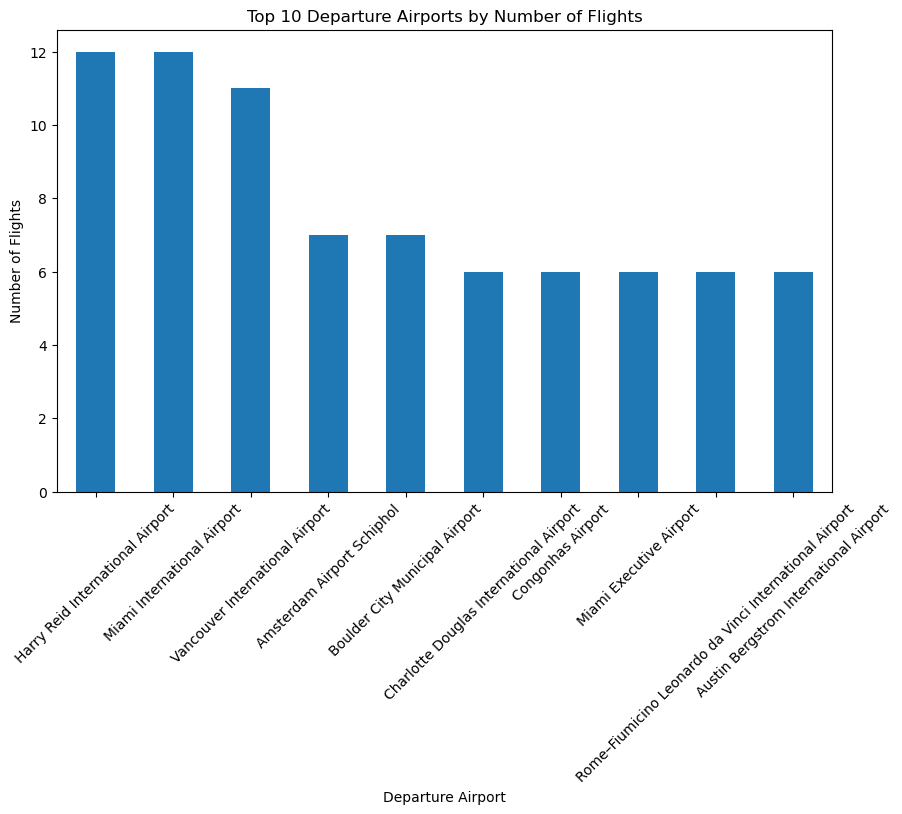

In [ ]:
import matplotlib.pyplot as plt


In [ ]:

# Plot the number of flights per departure airport
plt.figure(figsize=(10, 6))
merged_arrival['departure_airport_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Departure Airports by Number of Flights')
plt.xlabel('Departure Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Group by departure country and count the number of flights
flights_by_country = merged_arrival.groupby('departure_country').size().reset_index(name='flight_count')

# Sort the countries by the number of flights in descending order
flights_by_country = flights_by_country.sort_values(by='flight_count', ascending=False)

# Display the top 10 countries with the most flights
print(flights_by_country.head(10))